In [1]:
#numpy arrays are actually tensors where np.array(1) is constant value, np.array([1,2,3,4]) is a
# first order tensor or vector,  np.array([[1,2], [3,4]]) is a second order tensor or a matrix(any order), 
# np.array([[[1,2], [3,4]], [[4,5], [6,7]]]) is a third order tensor only 

#np.shape() gives us a tuple with the number of elements in each dimension, so in the above 3rd order tensor, 
# it will output {2, 2, 2}, ie, in the first dimension(corresponding to first bracket) there are 2 ele of 2D each
# in the second dimension(the second bracket) there are 2 ele of 1D each, and in the third dim there are 2 ele
#of 0D each

In [2]:
#to plot a scatterplot using matplotlib.pyplot we use plt.scatter(np.array, np.array)
#plt.show()

#to plot a plot we use plt.plot(np.array, np.array)
#np.zero(n) will return a 1st order tensor with n entries

IMPLEMENTING BATCH GRADIENT DESCENT LINEAR REGRESSION ALGO 
with only 1 feature

In [1]:
import sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import matplotlib

In [7]:
df = pd.read_csv('data.csv')  #loading the csv as a pandas dataframe
arr = df.to_numpy()   #df converted to numpy array


In [8]:
print(arr)
m = arr.shape[0]  #number of training samples
print(m)

[[  1 300]
 [  2 500]]
2


In [9]:
x_train = []
y_train = []

for i in range(m):
    x_train.append(arr[i][0])
    y_train.append(arr[i][1])

print(x_train)
print(y_train)

[1, 2]
[300, 500]


In [10]:
#function for finding cost
def caculate_cost(x, y, w, b, m): 

    """
    Finds the gradient of the cost function J(w,b)
    Args:
        x (ndarray (m,)): feature data, m samples
        y (ndarray (m,)): target data, m samples
        w (scalar): weight
        b (scalar): bias
        m (scalar): number of traning samples
    Returns:
        J (scalar): cost value
    """
    
    J = 0
    for i in range(m):
        J += (w*x[i] + b - y[i])**2
    J /= (2*m)
    return J


In [11]:
#defining the function to find gradient
def calculate_gradient(x, y, w, b, m): 

    """
    Finds the gradient of the cost function J(w,b)
    Args:
        x (ndarray (m,)): feature data, m samples
        y (ndarray (m,)): target data, m samples
        w (scalar): weight
        b (scalar): bias
        m (scalar): number of training samples
    Returns:
        dJ_dw (scalar): the gradient of cost wrt w
        dJ_db (scalar): the gradiene of cost wrt b
    """
    
    dJ_dw = 0
    dJ_db = 0

    for i in range(m):
        dJ_dw += (w*x[i] + b - y[i])*x[i]
        dJ_db += (w*x[i] + b - y[i])
        
    dJ_dw /= m
    dJ_db /= m

    return dJ_dw, dJ_db

In [12]:
#The linear regression algo which uses batch gradient descent 
def linear_regr(x, y, w, b, m, a, e):

    """
    Updates the values of w,b to find the best fit line
    Args:
        x (ndarray (m,)): feature data, m samples
        y (ndarray (m,)): target data, m samples
        w (scalar): weight
        b (scalar): bias
        m (scalar): number of traning samples
        a (scalar): learning rate
        e (scalar): number of epochs
    Returns:
        w (scalar): updated w
        b (scalar): updated b
        e_history (list): list of 1000th epoch
        cost_history (list): list of cost at every 1000th epoch
    """

    e_history = []
    cost_history = []

    for i in range(e):
        dJ_dw, dJ_db = calculate_gradient(x, y, w, b, m)

        w -= a*dJ_dw
        b -= a*dJ_db


        if (i+1)%1000 == 0:
            J = caculate_cost(x, y, w, b, m)
            print(f"iteration: {i+1}  Cost: {J}")
            e_history.append(i+1)
            cost_history.append(J)
        


    return w, b, e_history, cost_history

In [13]:
w_in = 0
b_in = 0
a = 0.01
epochs = 10000

w, b, e_history, cost_history = linear_regr(x_train, y_train, w_in, b_in, m, a, epochs)
e_history = np.array(e_history)
cost_history = np.array(cost_history)
print(f"w: {w}, b: {b}")

#total number of iterations = epochs*m which is 10000*2 = 20000


iteration: 1000  Cost: 3.417495171534028
iteration: 2000  Cost: 0.7940531538321492
iteration: 3000  Cost: 0.18449782061508938
iteration: 4000  Cost: 0.04286796878451238
iteration: 5000  Cost: 0.009960349350379087
iteration: 6000  Cost: 0.0023142817818187526
iteration: 7000  Cost: 0.0005377221197020276
iteration: 8000  Cost: 0.00012493944354081244
iteration: 9000  Cost: 2.902961209925379e-05
iteration: 10000  Cost: 6.745014662580395e-06
w: 199.99285075131766, b: 100.011567727362


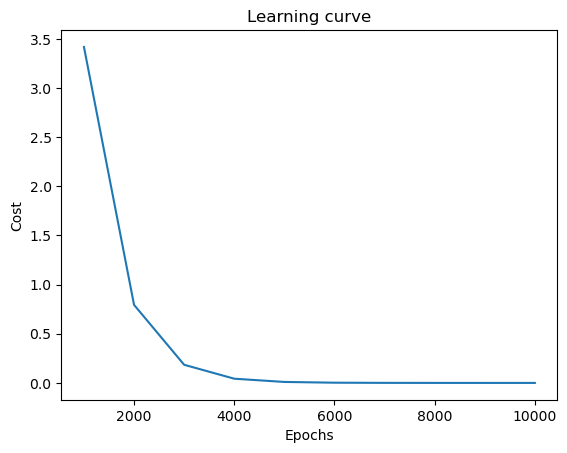

In [14]:
#plotting the learning curve(epochs vs cost)
plt.plot(e_history, cost_history)
plt.title("Learning curve")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

In [15]:
#trained model
def trained_model(x):
    global w,b

    """
    returns the best fit lines output
    Args:
        x (scalar): new input
    Returns:
        y (scalar): the predicted output    
    """
    
    y = w*x + b
    return y

In [16]:
y = trained_model(3)
print(f"predicted output: {y}")

predicted output: 699.990119981315
